In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os,glob
import numpy as np
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D


In [3]:
df1 = pd.read_csv('IAnum.csv')
num = df1['num']
num_list = np.array(num).tolist()
#print (num_list)

Text(0.5, 1.0, 'Histogram of IAs')

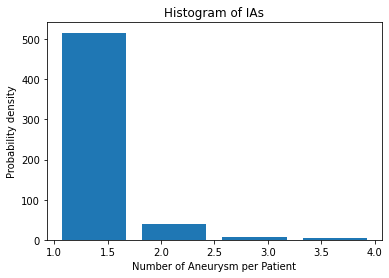

In [4]:
plt.hist(num_list,4,rwidth=0.8)

plt.xlabel('Number of Aneurysm per Patient')
plt.ylabel('Probability density')
plt.title(r'Histogram of IAs')

Text(0.5, 1.0, 'Histogram of Age')

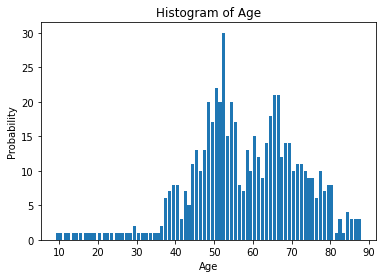

In [5]:
df1 = pd.read_csv('IAnum.csv')
age = df1['age']
age_list = np.array(age).tolist()
age_np = np.array(age_list)

x = np.unique(age_np)
#print (num_list)

plt.hist(age_list,x,rwidth=0.8)

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title(r'Histogram of Age')

In [2]:
cta_list = sorted(glob.glob(os.path.join('/root/workspace/renyan/data/original_datasets/20210315_505patients/niigz/cta_img','*_cta.nii.gz')))
seg_list = sorted(glob.glob(os.path.join('/root/workspace/renyan/data/original_datasets/20210315_505patients/niigz/ane_seg','*_seg.nii.gz')))

In [3]:
csv_rows = []  
for i, cta in enumerate(cta_list):
    cta_nii = nib.load(cta) 
    cta_data = cta_nii.get_fdata()

    seg_nii = nib.load(seg_list[i]) 
    seg_data = seg_nii.get_fdata()
    
    #已经通过检查
    #assert cta_data.shape==seg_data.shape

    csv_whole_shape = cta_data.shape
    csv_slices = cta_data.shape[2]

    csv_all_voxels = cta_data.shape[0]*cta_data.shape[1]*cta_data.shape[2]
    
    #检查标签是否都是0和1
    non_zero_num = np.count_nonzero(seg_data)
    seg_sum = seg_data.sum()
    
    assert non_zero_num == seg_data.sum()
    
    csv_IA_voxels = non_zero_num
    
    IA_num = float(non_zero_num)
    whole_num = float(csv_all_voxels)
    csv_ratio = IA_num / whole_num
    
    csv_id = os.path.basename(cta)[:-11]

    
    csv_rows.append([csv_id, csv_whole_shape,csv_slices, csv_all_voxels,csv_IA_voxels,csv_ratio])
    print ([csv_id, csv_whole_shape,csv_slices, csv_all_voxels,csv_IA_voxels,csv_ratio])
    

print (csv_rows)

['0813', (512, 512, 557), 557, 146014208, 114, 7.807459394636445e-07]
['14409', (512, 512, 557), 557, 146014208, 355, 2.4312702500841563e-06]
['151667', (512, 512, 265), 265, 69468160, 6569, 9.456130693543631e-05]
['198420', (512, 512, 579), 579, 151781376, 332, 2.187356635902418e-06]
['2174', (512, 512, 771), 771, 202113024, 975, 4.824033507113327e-06]
['240040', (512, 512, 301), 301, 78905344, 1416, 1.794555258513289e-05]
['271870', (512, 512, 222), 222, 58195968, 1837, 3.156576070699606e-05]
['277702', (512, 512, 298), 298, 78118912, 74, 9.472738176384228e-07]
['28272', (512, 512, 557), 557, 146014208, 5791, 3.9660523995034784e-05]
['283534', (512, 512, 387), 387, 101449728, 3067, 3.0231722257550065e-05]
['293250', (512, 512, 699), 699, 183238656, 613, 3.345363982586731e-06]
['294627', (512, 512, 699), 699, 183238656, 565, 3.083410522286302e-06]
['298438', (512, 512, 699), 699, 183238656, 206, 1.1242169337893418e-06]
['298447', (512, 512, 601), 601, 157548544, 2644, 1.67821290687396

In [4]:
with open('IAsize.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['id',	'whole_shape',	'slices',	'all_voxels',	'IA_voxels','ratio'])
    
    for row in csv_rows:
        
        writer.writerow(row)
print ('done!')

done!
